In [1]:
%cd ~/src/laboratori/1718

/home/jovyan/src/laboratori/1718


# **Introduzione al Machine Learning -- laboratorio 17 e 18**

- Regressione multipla
- Stepwise forward
- Inferenza

Importa le librerie necessarie: pandas, numpy, matplotlib, seaborn e statsmodels.api.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Definisce il nome del file Excel e legge i dati dal foglio 'mtst0906.2', selezionando le colonne da 'A' a 'J' e usando la prima colonna come indice. Memorizza i dati nel DataFrame `dfm`.

In [3]:
multireg_filename = 'stin22-lab1718.xlsx'

dfm = pd.read_excel(multireg_filename, sheet_name='mtst0906.2', usecols='A:J', index_col=0)

Visualizza il DataFrame `dfm` caricato nella cella precedente.

In [4]:
dfm

mpg  cylin   disp     hp      wt  accel  year  orig  \
id                                                            
1.0    18.0    8.0  307.0  130.0  3504.0   12.0  70.0   1.0   
2.0    15.0    8.0  350.0  165.0  3693.0   11.5  70.0   1.0   
3.0    18.0    8.0  318.0  150.0  3436.0   11.0  70.0   1.0   
4.0    16.0    8.0  304.0  150.0  3433.0   12.0  70.0   1.0   
5.0    17.0    8.0  302.0  140.0  3449.0   10.5  70.0   1.0   
...     ...    ...    ...    ...     ...    ...   ...   ...   
403.0  32.0    4.0  135.0   84.0  2295.0   11.6  82.0   1.0   
404.0  28.0    4.0  120.0   79.0  2625.0   18.6  82.0   1.0   
405.0  31.0    4.0  119.0   82.0  2720.0   19.4  82.0   1.0   
NaN     NaN    NaN    NaN    NaN     NaN    NaN   NaN   NaN   
406.0   NaN    4.0   79.0    NaN  1825.0   18.6  77.0   2.0   

                            name  
id                                
1.0    Chevrolet Chevelle Malibu  
2.0            Buick Skylark 320  
3.0           Plymouth Satellite  
4.0                Amc Rebel Sst  
5.0                  Ford Torino  
...                          ...  
403.0              Dodge Rampage  
404.0                Ford Ranger  
405.0                 Chevy S-10  
NaN                          NaN  
406.0              Renault 5 Gtl  

[407 rows x 9 columns]

Rimuove le ultime due righe e l'ultima colonna dal DataFrame `dfm` usando `iloc` e memorizza il risultato in `dft`. Visualizza le dimensioni (forma) del nuovo DataFrame `dft`.

In [5]:
# Droppo le ultime due righe

dft = dfm.iloc[:-2, :-1]
dft.shape

(405, 8)

Converte il tipo di dati dell'indice del DataFrame `dft` in intero (`int`) e visualizza il DataFrame aggiornato.

In [6]:
dft.index = dft.index.astype(int)
dft

mpg  cylin   disp     hp      wt  accel  year  orig
id                                                       
1    18.0    8.0  307.0  130.0  3504.0   12.0  70.0   1.0
2    15.0    8.0  350.0  165.0  3693.0   11.5  70.0   1.0
3    18.0    8.0  318.0  150.0  3436.0   11.0  70.0   1.0
4    16.0    8.0  304.0  150.0  3433.0   12.0  70.0   1.0
5    17.0    8.0  302.0  140.0  3449.0   10.5  70.0   1.0
..    ...    ...    ...    ...     ...    ...   ...   ...
401  27.0    4.0  140.0   86.0  2790.0   15.6  82.0   1.0
402  44.0    4.0   97.0   52.0  2130.0   24.6  82.0   2.0
403  32.0    4.0  135.0   84.0  2295.0   11.6  82.0   1.0
404  28.0    4.0  120.0   79.0  2625.0   18.6  82.0   1.0
405  31.0    4.0  119.0   82.0  2720.0   19.4  82.0   1.0

[405 rows x 8 columns]

Visualizza le prime 20 righe della colonna 'mpg' del DataFrame `dft`.

In [7]:
dft['mpg'][:20]

id
1     18.0
2     15.0
3     18.0
4     16.0
5     17.0
6     15.0
7     14.0
8     14.0
9     14.0
10    15.0
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16    15.0
17    14.0
18     NaN
19    15.0
20    14.0
Name: mpg, dtype: float64

Seleziona le righe del DataFrame `dft` dove la colonna 'mpg' ha valori mancanti (NaN). Rimuove la colonna 'mpg' da queste righe e memorizza il risultato nel DataFrame `dft_new`. Visualizza `dft_new`.

In [8]:
# Separo le righe con mpg NaN dalle altre
# Devo fare prediction

dft_new = dft[dft['mpg'].isna()].drop(columns="mpg")
dft_new

cylin   disp     hp      wt  accel  year  orig
id                                                 
11     4.0  133.0  115.0  3090.0   17.5  70.0   2.0
12     8.0  350.0  165.0  4142.0   11.5  70.0   1.0
13     8.0  351.0  153.0  4034.0   11.0  70.0   1.0
14     8.0  383.0  175.0  4166.0   10.5  70.0   1.0
15     8.0  360.0  175.0  3850.0   11.0  70.0   1.0
18     8.0  302.0  140.0  3353.0    8.0  70.0   1.0
40     4.0   97.0   48.0  1978.0   20.0  71.0   2.0
367    4.0  121.0  110.0  2800.0   15.4  81.0   2.0

Seleziona le righe del DataFrame `dft` dove la colonna 'mpg' *non* ha valori mancanti (contiene valori validi). Memorizza queste righe nel DataFrame `dft_train`. Visualizza `dft_train`.

In [9]:
# Separo le righr con "mpg" non NaN

dft_train = dft[dft['mpg'].notna()]
dft_train

mpg  cylin   disp     hp      wt  accel  year  orig
id                                                       
1    18.0    8.0  307.0  130.0  3504.0   12.0  70.0   1.0
2    15.0    8.0  350.0  165.0  3693.0   11.5  70.0   1.0
3    18.0    8.0  318.0  150.0  3436.0   11.0  70.0   1.0
4    16.0    8.0  304.0  150.0  3433.0   12.0  70.0   1.0
5    17.0    8.0  302.0  140.0  3449.0   10.5  70.0   1.0
..    ...    ...    ...    ...     ...    ...   ...   ...
401  27.0    4.0  140.0   86.0  2790.0   15.6  82.0   1.0
402  44.0    4.0   97.0   52.0  2130.0   24.6  82.0   2.0
403  32.0    4.0  135.0   84.0  2295.0   11.6  82.0   1.0
404  28.0    4.0  120.0   79.0  2625.0   18.6  82.0   1.0
405  31.0    4.0  119.0   82.0  2720.0   19.4  82.0   1.0

[397 rows x 8 columns]

Utilizza `seaborn` per generare una matrice di scatter plot e istogrammi (`pairplot`) per il DataFrame `dft_train`. Salva il grafico come file PDF ('images/pairplot.pdf') e lo visualizza.

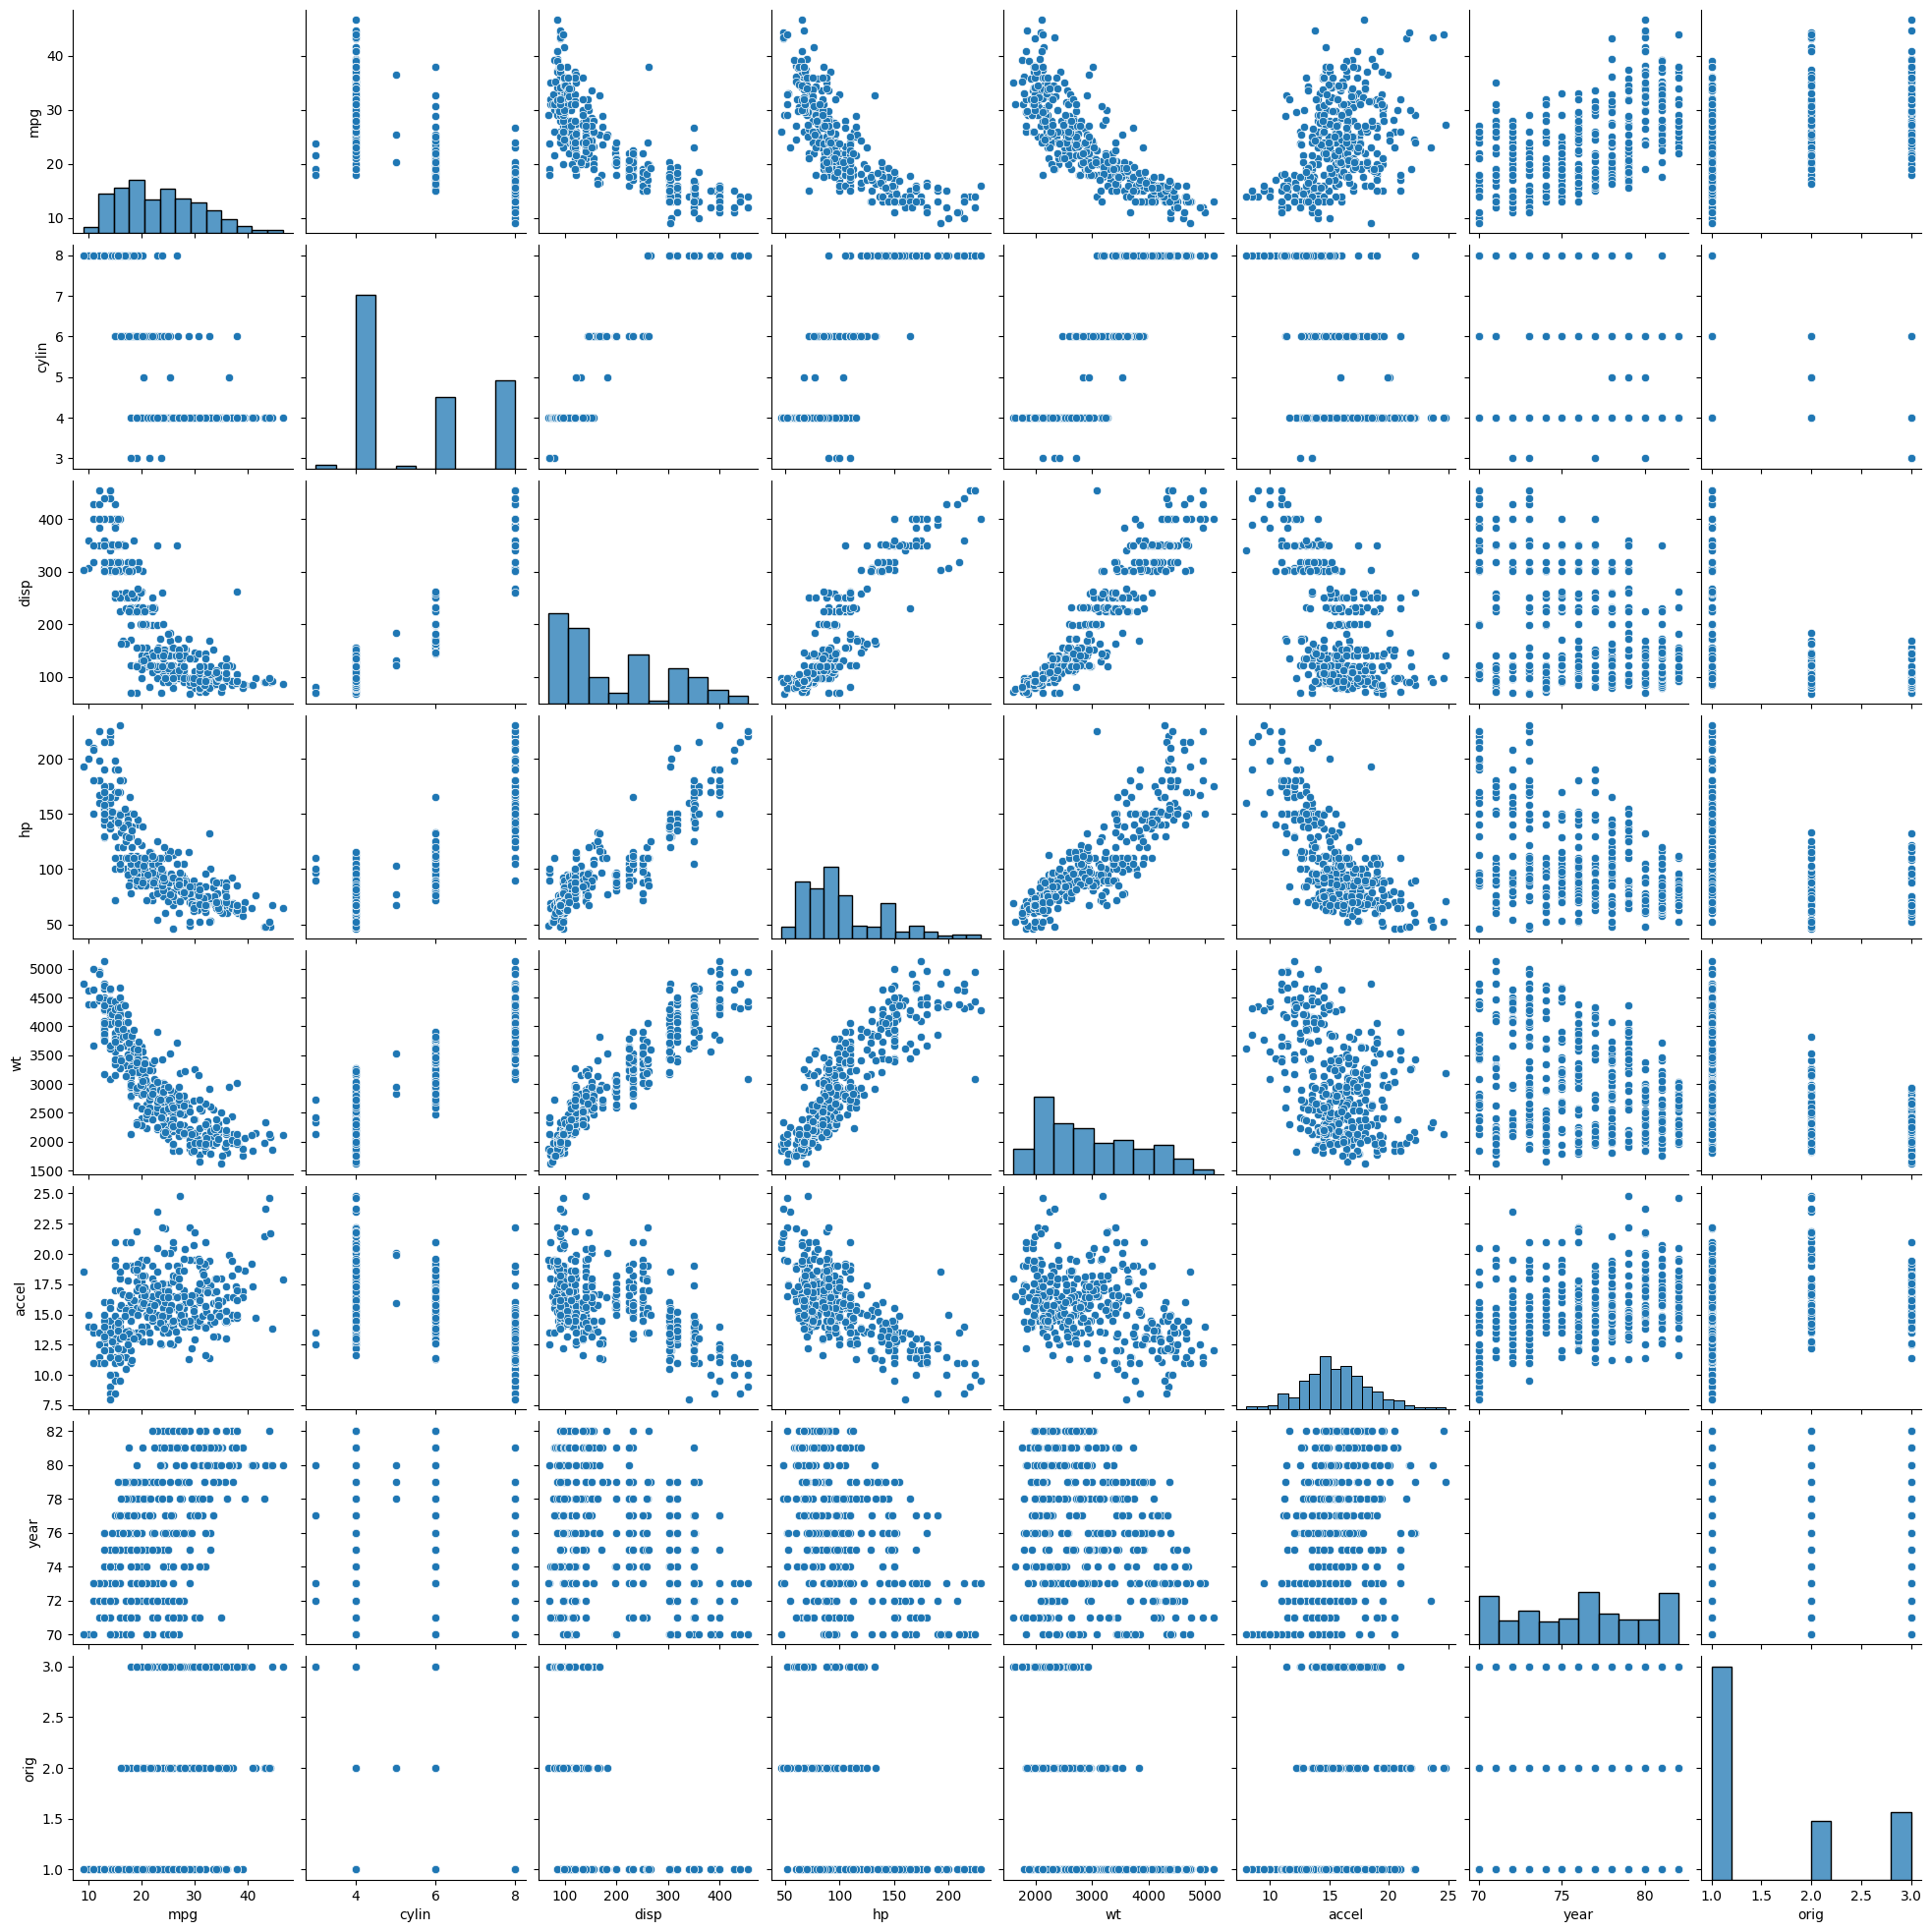

In [10]:
pair_plot = sns.pairplot(dft_train)
pair_plot.savefig('images/pairplot.pdf')
pair_plot

Calcola il reciproco della colonna 'mpg' (galloni per 100 miglia, 'gphm') e lo aggiunge come nuova colonna a `dft_train`. Visualizza il DataFrame aggiornato.

In [11]:
# Inverto mpg in gpm

dft_train['gphm'] = 100 / dft_train['mpg']
dft_train

/tmp/ipykernel_6657/2335361477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_train['gphm'] = 100 / dft_train['mpg']


mpg  cylin   disp     hp      wt  accel  year  orig      gphm
id                                                                 
1    18.0    8.0  307.0  130.0  3504.0   12.0  70.0   1.0  5.555556
2    15.0    8.0  350.0  165.0  3693.0   11.5  70.0   1.0  6.666667
3    18.0    8.0  318.0  150.0  3436.0   11.0  70.0   1.0  5.555556
4    16.0    8.0  304.0  150.0  3433.0   12.0  70.0   1.0  6.250000
5    17.0    8.0  302.0  140.0  3449.0   10.5  70.0   1.0  5.882353
..    ...    ...    ...    ...     ...    ...   ...   ...       ...
401  27.0    4.0  140.0   86.0  2790.0   15.6  82.0   1.0  3.703704
402  44.0    4.0   97.0   52.0  2130.0   24.6  82.0   2.0  2.272727
403  32.0    4.0  135.0   84.0  2295.0   11.6  82.0   1.0  3.125000
404  28.0    4.0  120.0   79.0  2625.0   18.6  82.0   1.0  3.571429
405  31.0    4.0  119.0   82.0  2720.0   19.4  82.0   1.0  3.225806

[397 rows x 9 columns]

Crea una copia di `dft_train` chiamata `dft_train2`, rimuovendo la colonna originale 'mpg'. Visualizza `dft_train2`.

In [12]:
dft_train2 = dft_train.drop(columns='mpg')
dft_train2

cylin   disp     hp      wt  accel  year  orig      gphm
id                                                           
1      8.0  307.0  130.0  3504.0   12.0  70.0   1.0  5.555556
2      8.0  350.0  165.0  3693.0   11.5  70.0   1.0  6.666667
3      8.0  318.0  150.0  3436.0   11.0  70.0   1.0  5.555556
4      8.0  304.0  150.0  3433.0   12.0  70.0   1.0  6.250000
5      8.0  302.0  140.0  3449.0   10.5  70.0   1.0  5.882353
..     ...    ...    ...     ...    ...   ...   ...       ...
401    4.0  140.0   86.0  2790.0   15.6  82.0   1.0  3.703704
402    4.0   97.0   52.0  2130.0   24.6  82.0   2.0  2.272727
403    4.0  135.0   84.0  2295.0   11.6  82.0   1.0  3.125000
404    4.0  120.0   79.0  2625.0   18.6  82.0   1.0  3.571429
405    4.0  119.0   82.0  2720.0   19.4  82.0   1.0  3.225806

[397 rows x 8 columns]

Genera un `pairplot` per il DataFrame `dft_train2` (con 'gphm' invece di 'mpg'). Salva il grafico come PDF ('images/pairplot2.pdf') e lo visualizza.

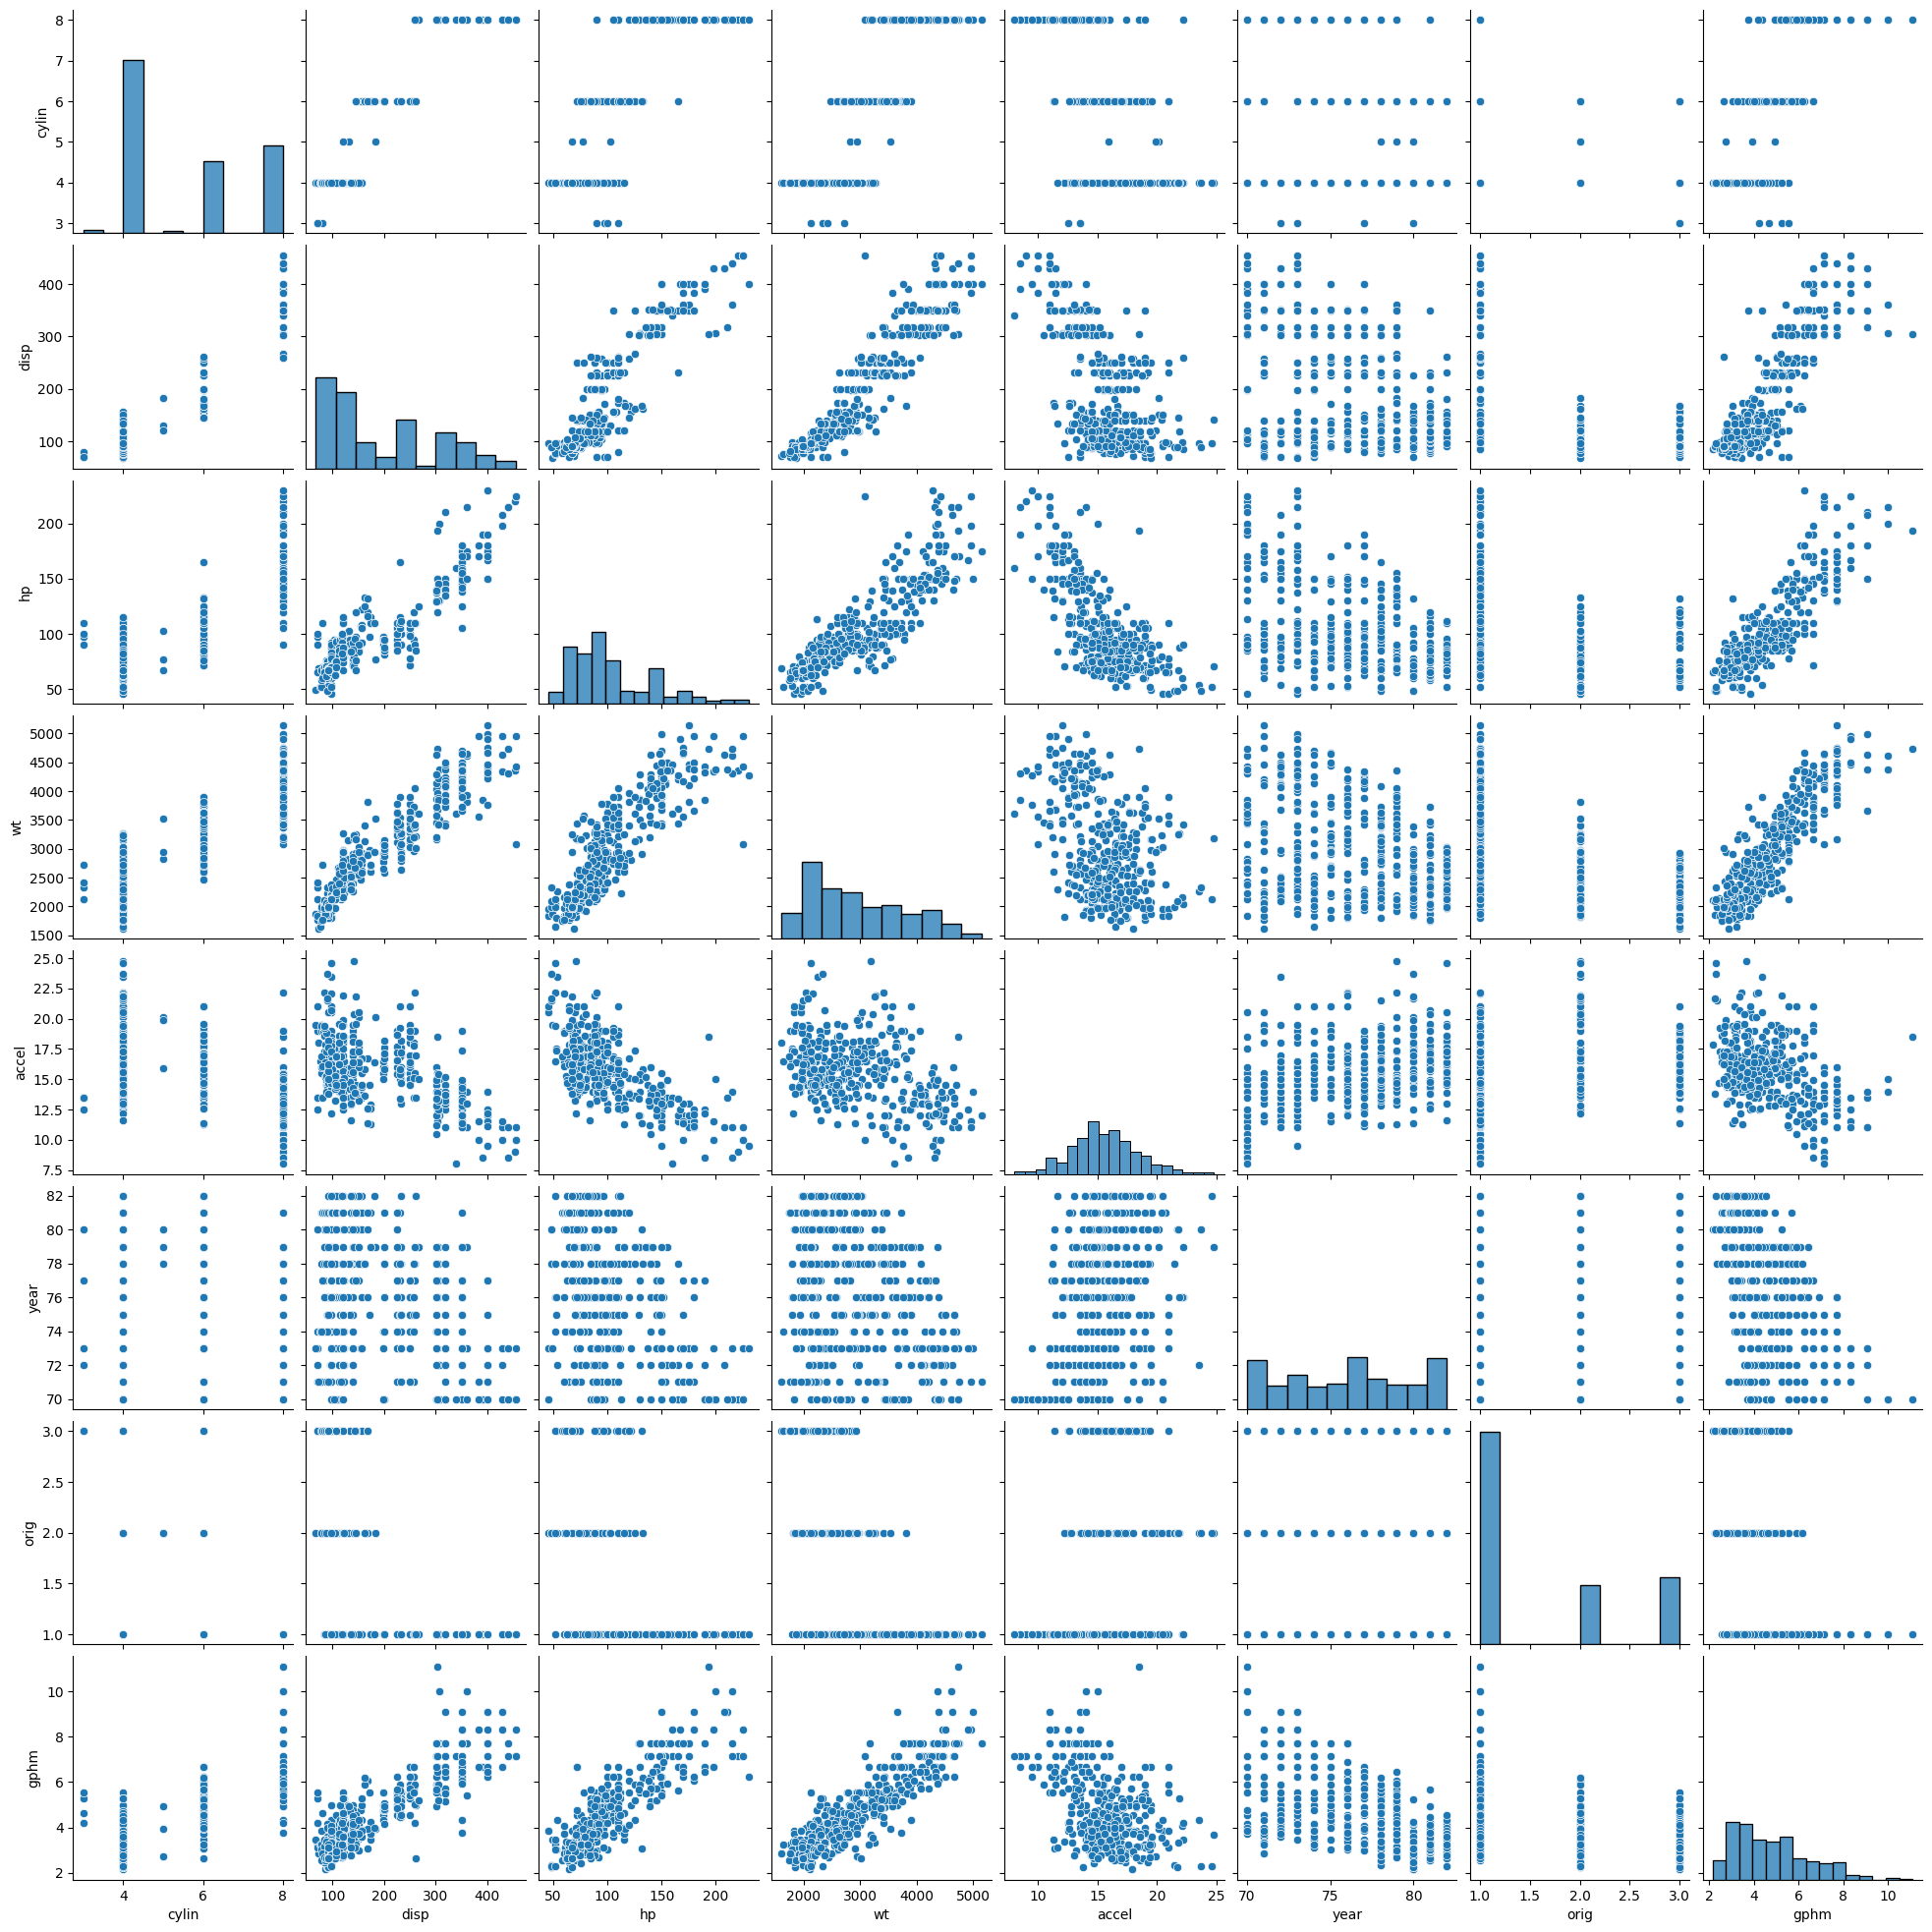

In [13]:
pair_plot = sns.pairplot(dft_train2)
pair_plot.savefig('images/pairplot2.pdf')
pair_plot

Calcola il reciproco della colonna 'accel' ('invacc') e lo aggiunge a `dft_train2`. Rimuove la colonna originale 'accel'. Visualizza il DataFrame aggiornato.

In [14]:
dft_train2['invacc'] = 100 / dft_train2['accel']
dft_train2 = dft_train2.drop(columns='accel')
dft_train2

cylin   disp     hp      wt  year  orig      gphm    invacc
id                                                              
1      8.0  307.0  130.0  3504.0  70.0   1.0  5.555556  8.333333
2      8.0  350.0  165.0  3693.0  70.0   1.0  6.666667  8.695652
3      8.0  318.0  150.0  3436.0  70.0   1.0  5.555556  9.090909
4      8.0  304.0  150.0  3433.0  70.0   1.0  6.250000  8.333333
5      8.0  302.0  140.0  3449.0  70.0   1.0  5.882353  9.523810
..     ...    ...    ...     ...   ...   ...       ...       ...
401    4.0  140.0   86.0  2790.0  82.0   1.0  3.703704  6.410256
402    4.0   97.0   52.0  2130.0  82.0   2.0  2.272727  4.065041
403    4.0  135.0   84.0  2295.0  82.0   1.0  3.125000  8.620690
404    4.0  120.0   79.0  2625.0  82.0   1.0  3.571429  5.376344
405    4.0  119.0   82.0  2720.0  82.0   1.0  3.225806  5.154639

[397 rows x 8 columns]

Genera un `pairplot` per il DataFrame `dft_train2` (con 'gphm' e 'invacc'). Salva il grafico come PDF ('images/pairplot3.pdf') e lo visualizza.

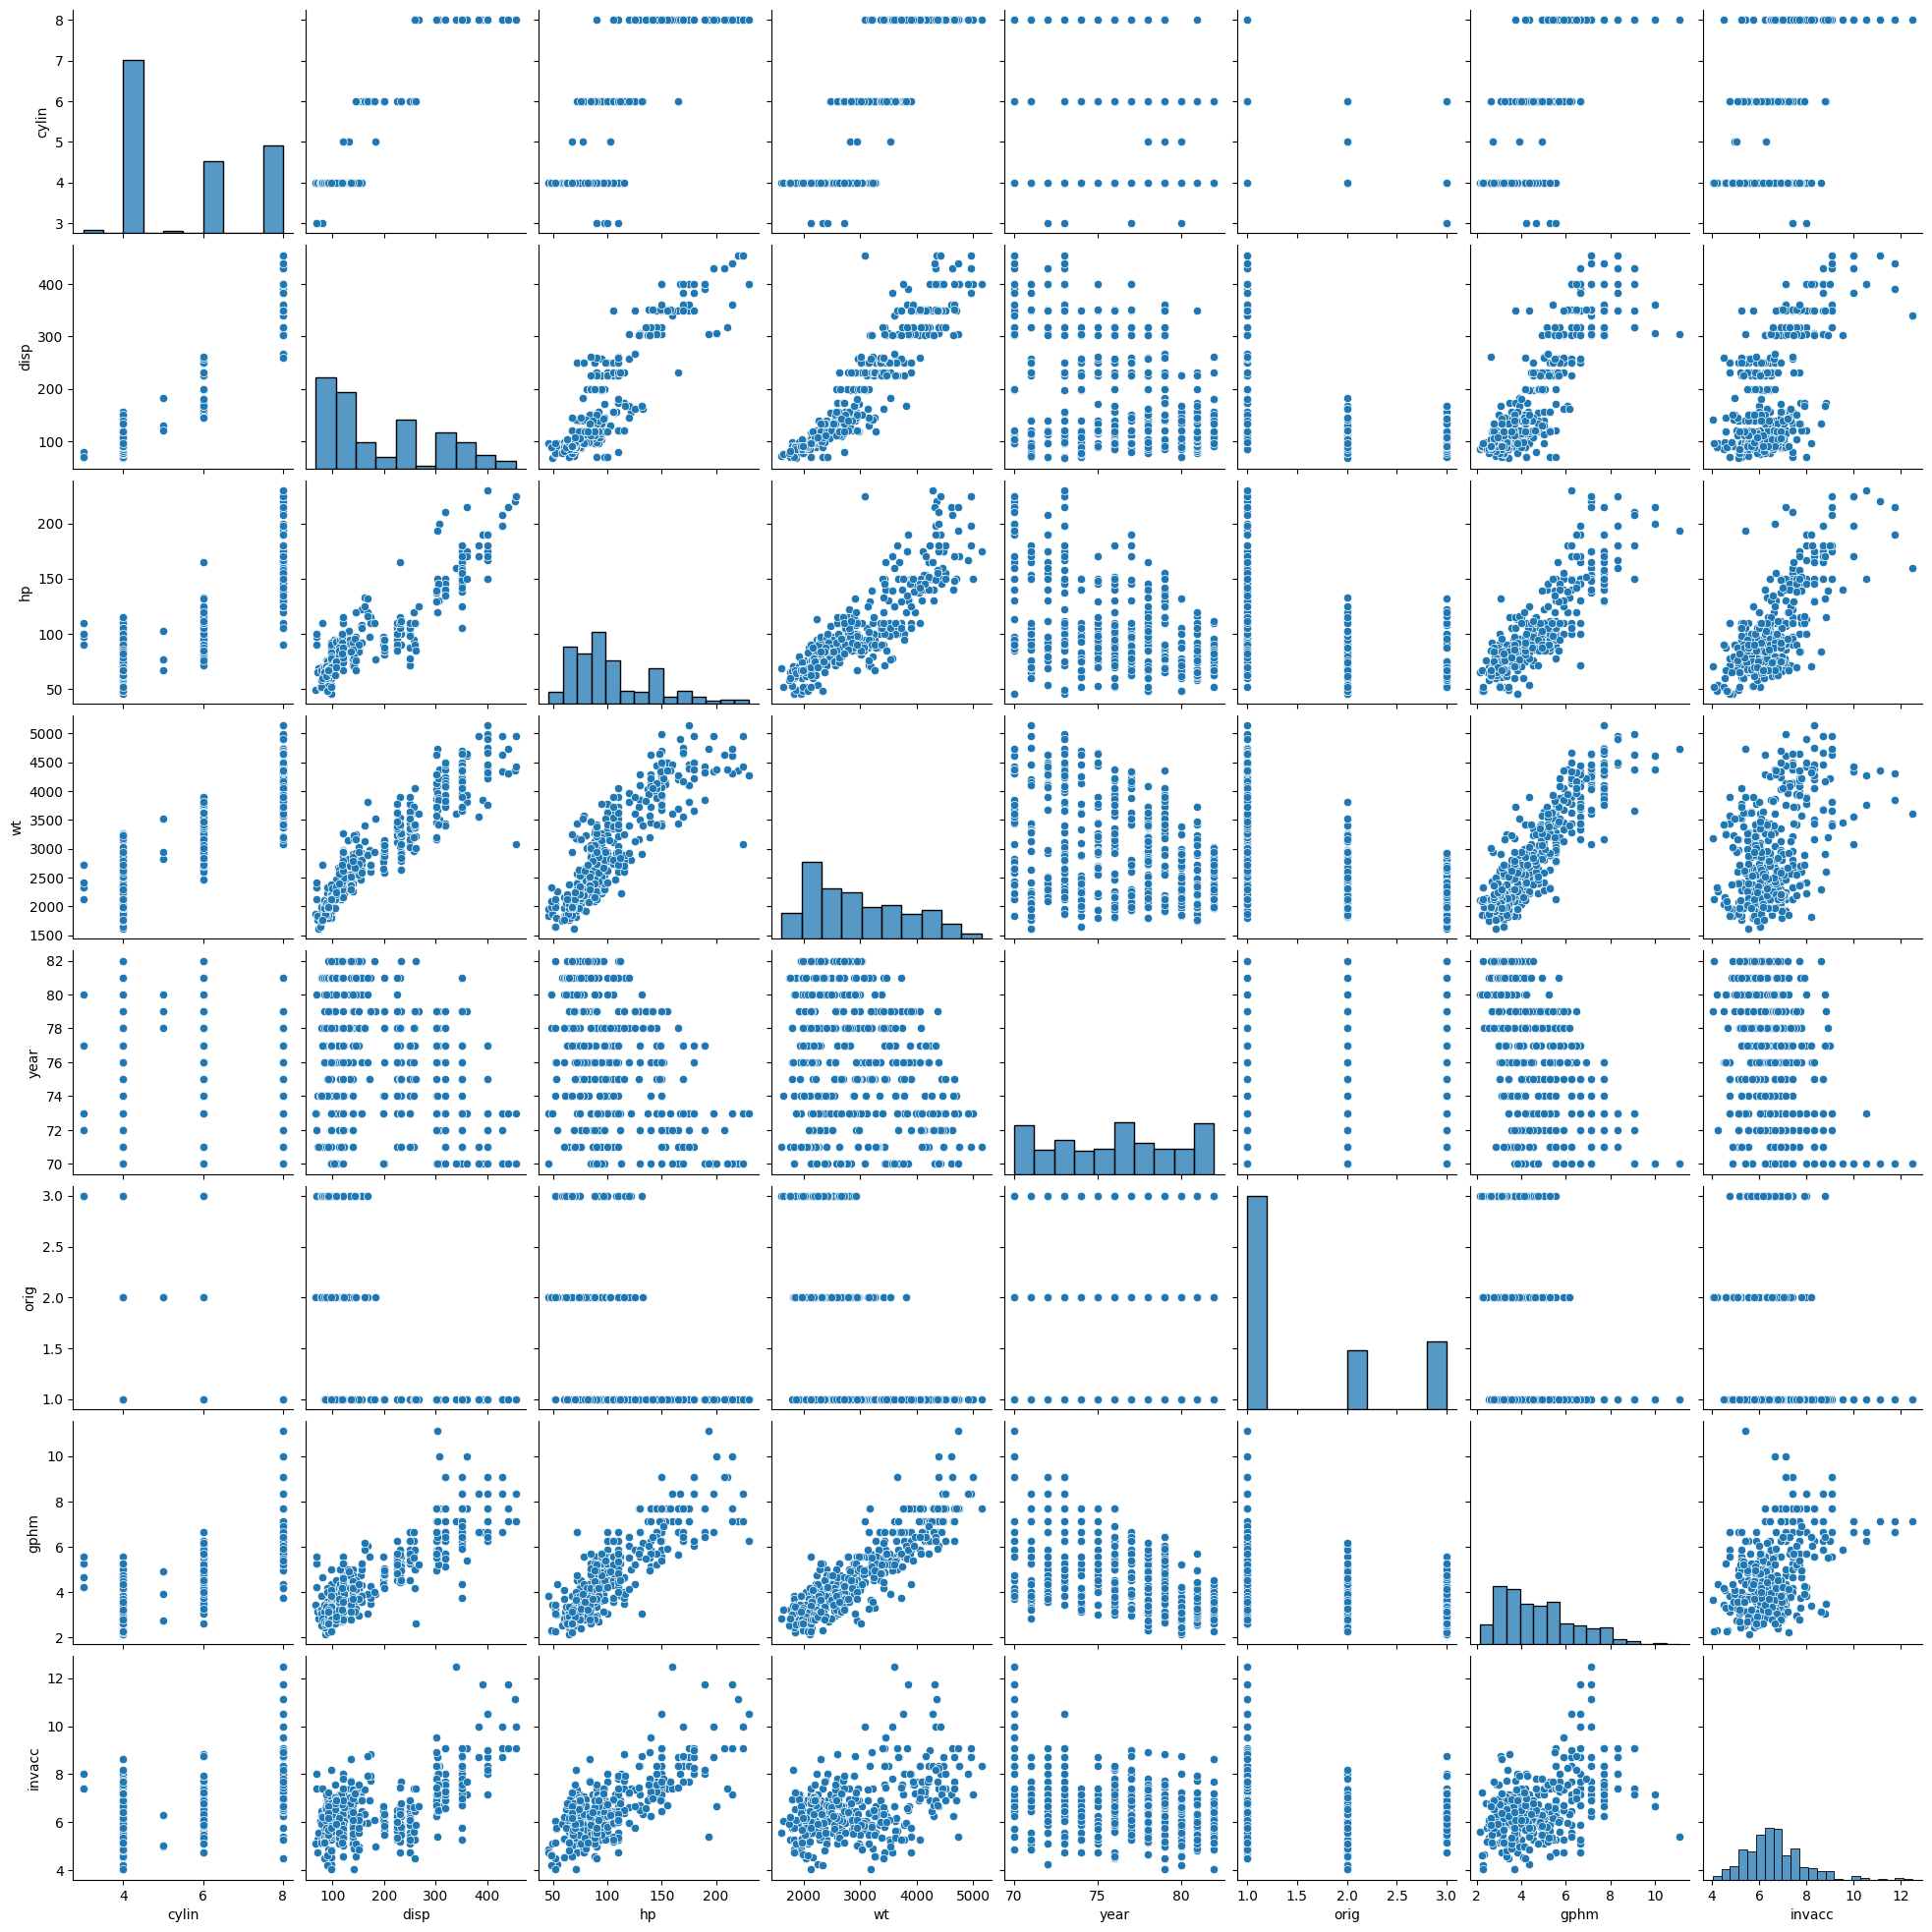

In [15]:
pair_plot = sns.pairplot(dft_train2)
pair_plot.savefig('images/pairplot3.pdf')
pair_plot

Crea una copia di `dft_train` chiamata `dft_train3`. Applica la trasformazione logaritmica alle colonne specificate (`cols`). Aggiunge le nuove colonne logaritmiche (con prefisso 'l') e rimuove le colonne originali e la colonna 'gphm'. Visualizza `dft_train3`.

In [16]:
# Una alternativa sarebbe fare i ogaritmi delle variabili originali. In quel caso non serve nemmeno fare i reciproci di mpg e accel
dft_train3 = dft_train.copy()
cols = ['mpg', 'disp', 'hp', 'wt', 'accel']

for col in cols:
    dft_train3['l' + col] = np.log(dft_train[col])
    dft_train3.drop(columns=col, inplace=True)

dft_train3.drop(columns='gphm', inplace=True)
dft_train3

cylin  year  orig      lmpg     ldisp       lhp       lwt    laccel
id                                                                      
1      8.0  70.0   1.0  2.890372  5.726848  4.867534  8.161660  2.484907
2      8.0  70.0   1.0  2.708050  5.857933  5.105945  8.214194  2.442347
3      8.0  70.0   1.0  2.890372  5.762051  5.010635  8.142063  2.397895
4      8.0  70.0   1.0  2.772589  5.717028  5.010635  8.141190  2.484907
5      8.0  70.0   1.0  2.833213  5.710427  4.941642  8.145840  2.351375
..     ...   ...   ...       ...       ...       ...       ...       ...
401    4.0  82.0   1.0  3.295837  4.941642  4.454347  7.933797  2.747271
402    4.0  82.0   2.0  3.784190  4.574711  3.951244  7.663877  3.202746
403    4.0  82.0   1.0  3.465736  4.905275  4.430817  7.738488  2.451005
404    4.0  82.0   1.0  3.332205  4.787492  4.369448  7.872836  2.923162
405    4.0  82.0   1.0  3.433987  4.779123  4.406719  7.908387  2.965273

[397 rows x 8 columns]

Genera un `pairplot` per `dft_train3`, colorando i punti in base alla colonna 'cylin' (numero di cilindri). Salva il grafico come PDF ('images/pairplot4.pdf') e lo visualizza.

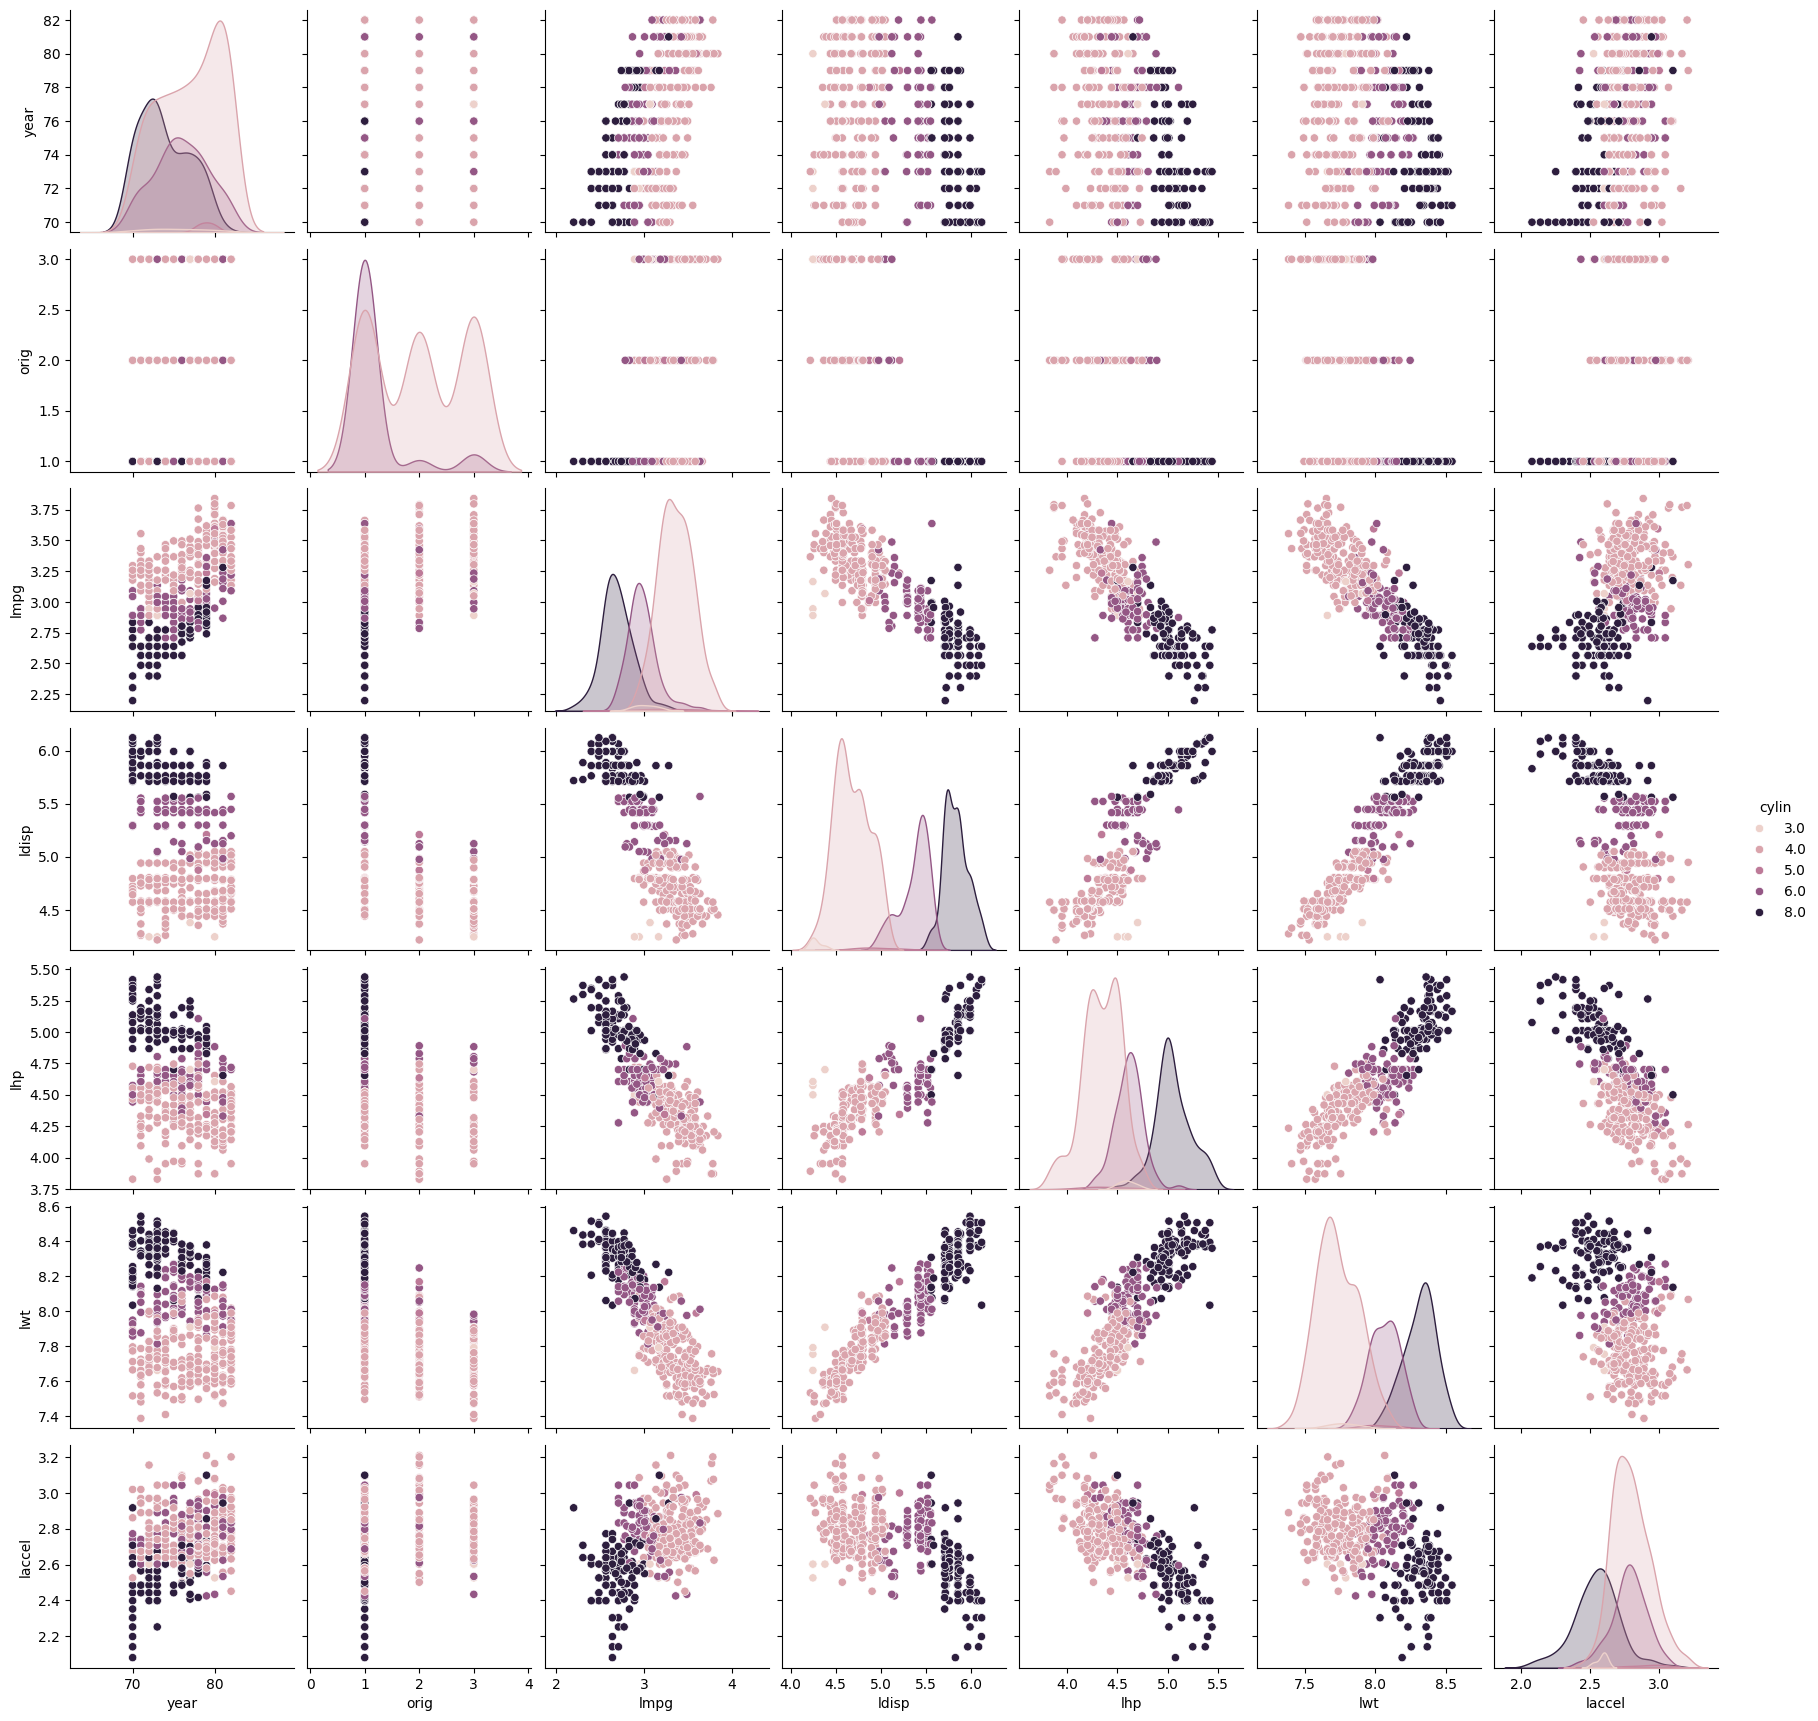

In [17]:
# In base ai cilindri
pair_plot = sns.pairplot(dft_train3, hue='cylin')
pair_plot.savefig('images/pairplot4.pdf')
pair_plot

Genera un `pairplot` per `dft_train3`, colorando i punti in base alla colonna 'orig' (origine). Salva il grafico come PDF ('images/pairplot5.pdf') e lo visualizza.

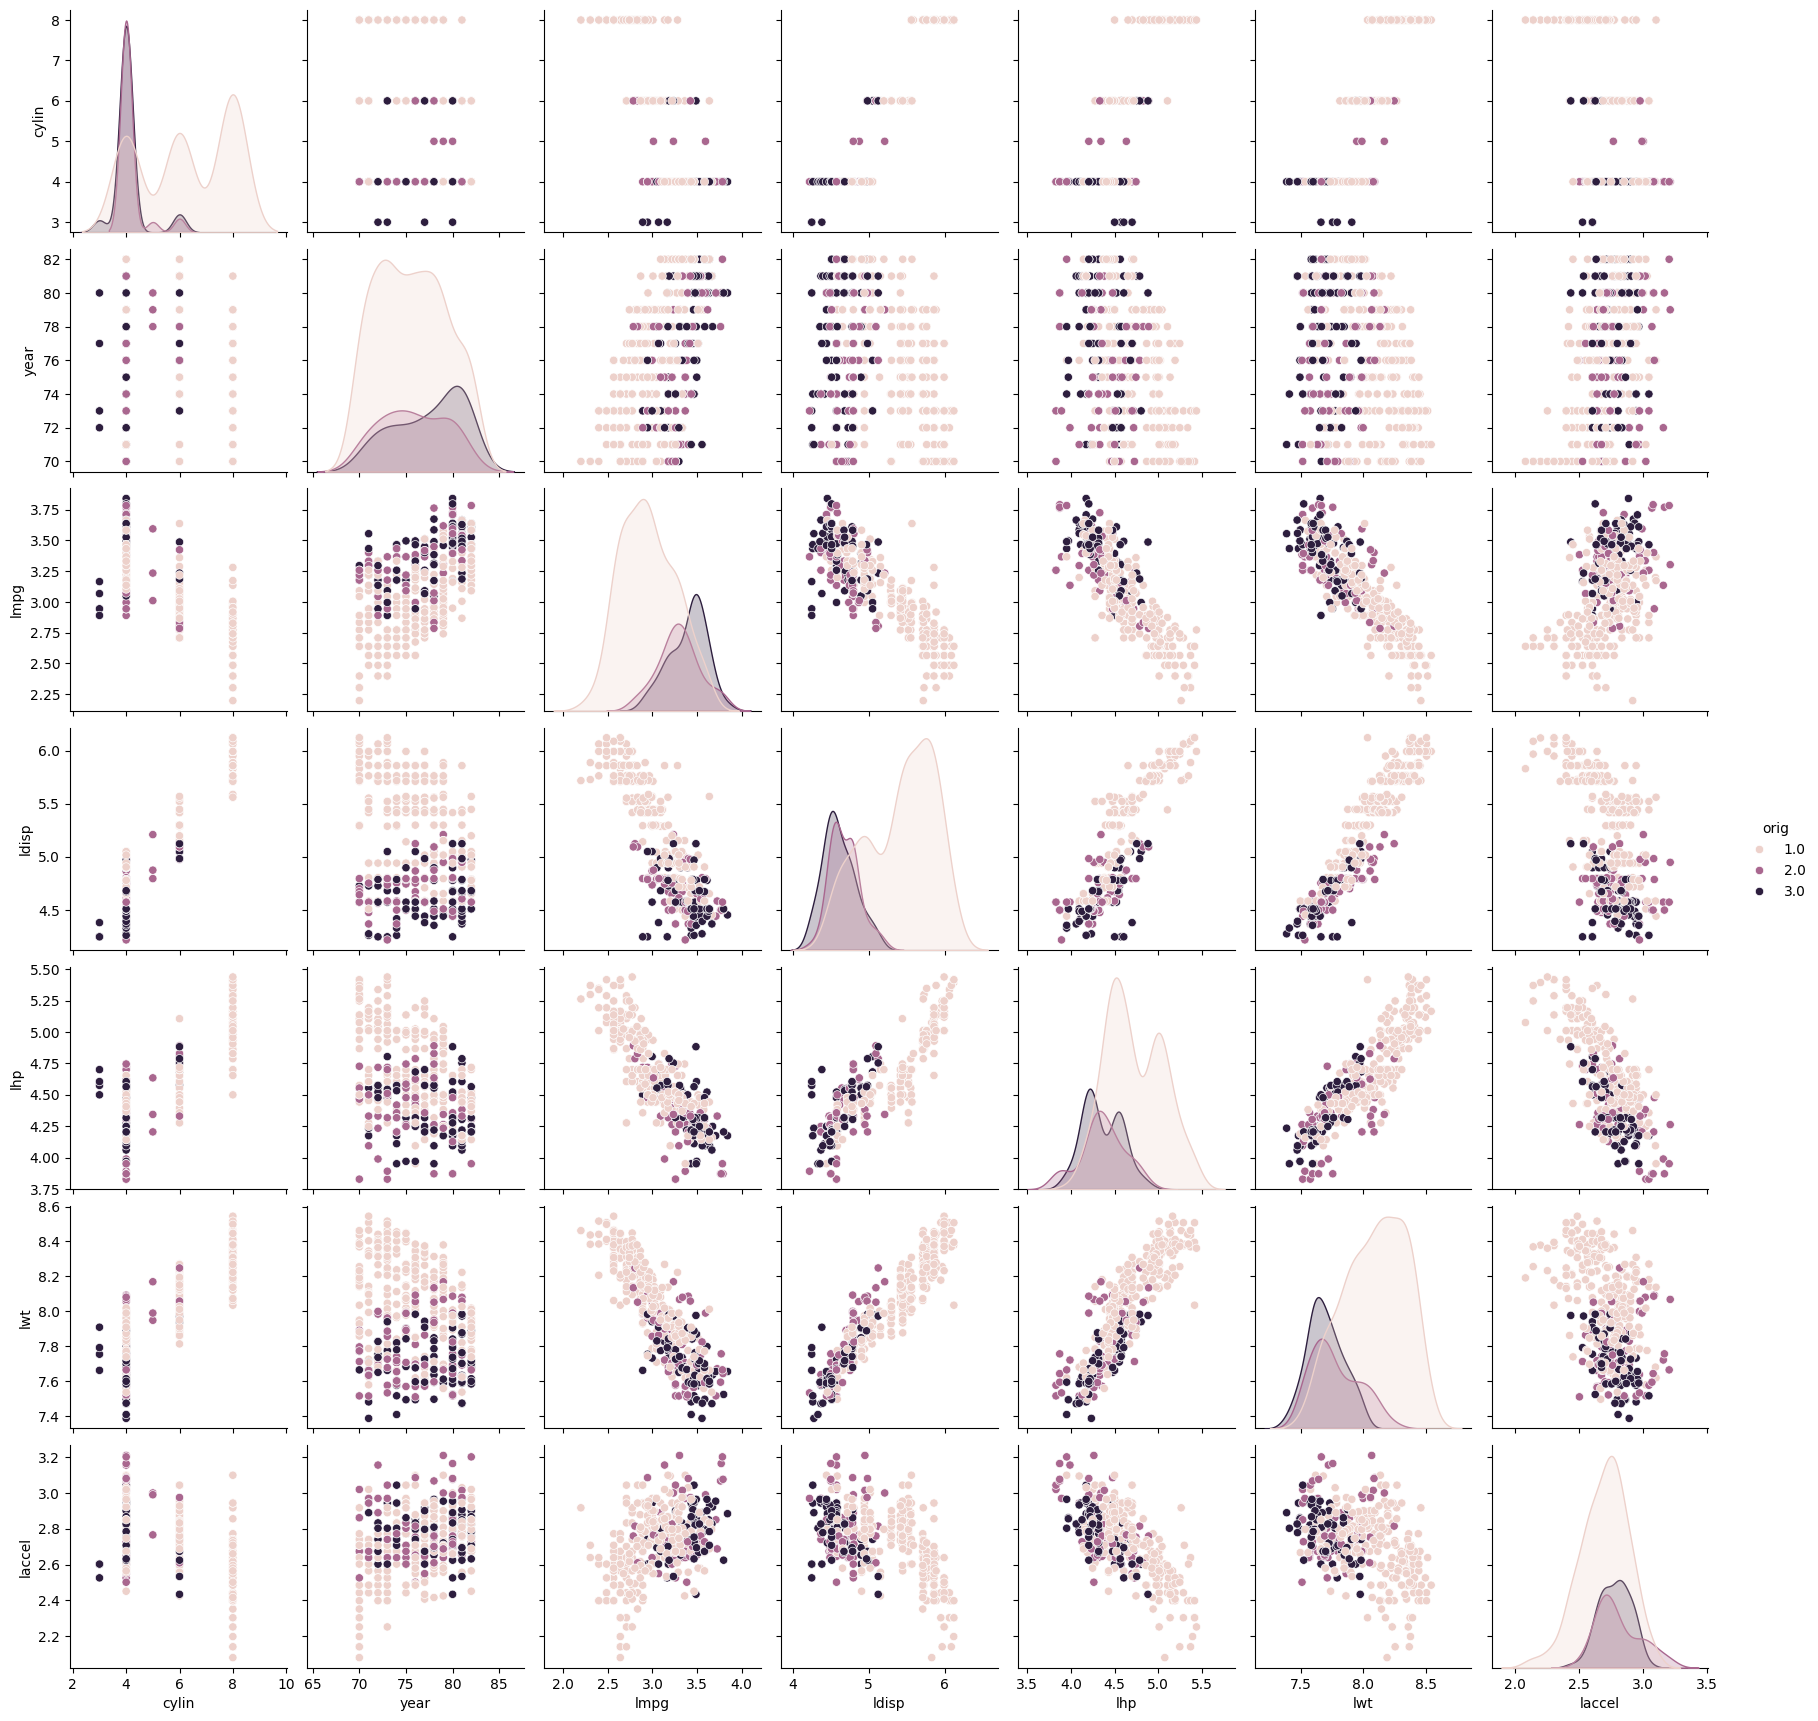

In [18]:
# In base all'origine
pair_plot = sns.pairplot(dft_train3, hue='orig')
pair_plot.savefig('images/pairplot5.pdf')
pair_plot

Converte la colonna categorica 'orig' in `dft_train3` in variabili dummy (one-hot encoding) di tipo intero. Memorizza il risultato in `dft_train4` e lo visualizza.

In [19]:
# Converto orig che è categorica in one-hot con tipo int
dft_train4 = pd.get_dummies(dft_train3, columns=['orig'], dtype=int)
dft_train4

cylin  year      lmpg     ldisp       lhp       lwt    laccel  orig_1.0  \
id                                                                             
1      8.0  70.0  2.890372  5.726848  4.867534  8.161660  2.484907         1   
2      8.0  70.0  2.708050  5.857933  5.105945  8.214194  2.442347         1   
3      8.0  70.0  2.890372  5.762051  5.010635  8.142063  2.397895         1   
4      8.0  70.0  2.772589  5.717028  5.010635  8.141190  2.484907         1   
5      8.0  70.0  2.833213  5.710427  4.941642  8.145840  2.351375         1   
..     ...   ...       ...       ...       ...       ...       ...       ...   
401    4.0  82.0  3.295837  4.941642  4.454347  7.933797  2.747271         1   
402    4.0  82.0  3.784190  4.574711  3.951244  7.663877  3.202746         0   
403    4.0  82.0  3.465736  4.905275  4.430817  7.738488  2.451005         1   
404    4.0  82.0  3.332205  4.787492  4.369448  7.872836  2.923162         1   
405    4.0  82.0  3.433987  4.779123  4.406719  7.908387  2.965273         1   

     orig_2.0  orig_3.0  
id                       
1           0         0  
2           0         0  
3           0         0  
4           0         0  
5           0         0  
..        ...       ...  
401         0         0  
402         1         0  
403         0         0  
404         0         0  
405         0         0  

[397 rows x 10 columns]

Rinomina le colonne dummy create per 'orig' in 'USA', 'EU', 'JP' per maggiore chiarezza. Visualizza il DataFrame `dft_train4` aggiornato.

In [20]:
# Rinomino le colonne

dft_train4.rename(columns={'orig_1.0': 'USA', 'orig_2.0': 'EU', 'orig_3.0': 'JP'}, inplace=True)
dft_train4

cylin  year      lmpg     ldisp       lhp       lwt    laccel  USA  EU  \
id                                                                            
1      8.0  70.0  2.890372  5.726848  4.867534  8.161660  2.484907    1   0   
2      8.0  70.0  2.708050  5.857933  5.105945  8.214194  2.442347    1   0   
3      8.0  70.0  2.890372  5.762051  5.010635  8.142063  2.397895    1   0   
4      8.0  70.0  2.772589  5.717028  5.010635  8.141190  2.484907    1   0   
5      8.0  70.0  2.833213  5.710427  4.941642  8.145840  2.351375    1   0   
..     ...   ...       ...       ...       ...       ...       ...  ...  ..   
401    4.0  82.0  3.295837  4.941642  4.454347  7.933797  2.747271    1   0   
402    4.0  82.0  3.784190  4.574711  3.951244  7.663877  3.202746    0   1   
403    4.0  82.0  3.465736  4.905275  4.430817  7.738488  2.451005    1   0   
404    4.0  82.0  3.332205  4.787492  4.369448  7.872836  2.923162    1   0   
405    4.0  82.0  3.433987  4.779123  4.406719  7.908387  2.965273    1   0   

     JP  
id       
1     0  
2     0  
3     0  
4     0  
5     0  
..   ..  
401   0  
402   0  
403   0  
404   0  
405   0  

[397 rows x 10 columns]

Visualizza le dimensioni (forma) del DataFrame `dft_train4`.

In [21]:
dft_train4.shape

(397, 10)

Rimuove tutte le righe da `dft_train4` che contengono almeno un valore mancante (NaN) in qualsiasi colonna. Memorizza il DataFrame pulito in `dft_train5`. Visualizza le dimensioni del nuovo DataFrame.

In [22]:
# Droppo le righe di dft_train4 che contengono dei nan su qualsiasi colonna

dft_train5 = dft_train4.dropna()
dft_train5.shape

(391, 10)

Prepara i dati per la regressione: definisce la matrice dei predittori `x` (aggiungendo una costante e rimuovendo 'lmpg' da `dft_train5`) e la variabile dipendente `y` ('lmpg'). Crea un modello OLS (Ordinary Least Squares) usando `statsmodels` e lo adatta ai dati. Stampa il sommario completo dei risultati della regressione.

In [23]:
# Lancio la prima regressione

x = sm.add_constant(dft_train5.drop(columns='lmpg'))
y = dft_train5['lmpg']

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     392.1
Date:                Mon, 05 May 2025   Prob (F-statistic):          5.53e-179
Time:                        07:51:32   Log-Likelihood:                 302.09
No. Observations:                 391   AIC:                            -586.2
Df Residuals:                     382   BIC:                            -550.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4433      0.277     19.647      0.0

Modifica la matrice dei predittori `x` rimuovendo la colonna 'EU' (trattandola come categoria di riferimento). Crea un nuovo modello OLS con la matrice `x` aggiornata e lo adatta. Stampa il sommario dei risultati di questo modello.

In [24]:
# Metto come default EU e droppo la relativa colonna

x.drop(columns='EU', inplace=True)

model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     392.1
Date:                Mon, 05 May 2025   Prob (F-statistic):          5.53e-179
Time:                        07:51:32   Log-Likelihood:                 302.09
No. Observations:                 391   AIC:                            -586.2
Df Residuals:                     382   BIC:                            -550.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2752      0.370     19.643      0.0

Calcola la deviazione standard dei residui (`Se`) dal modello precedente (`result`) prendendo la radice quadrata dell'errore quadratico medio dei residui (`mse_resid`). Stampa il valore di `Se`.

In [25]:
Se = np.sqrt(result.mse_resid)
print(f'{Se=:g}')

Se=0.113054


Definisce una funzione `plot_resid` che genera grafici dei residui: residui vs valori predetti e residui vs ciascun predittore. Chiama questa funzione per visualizzare i grafici dei residui del modello `result`.

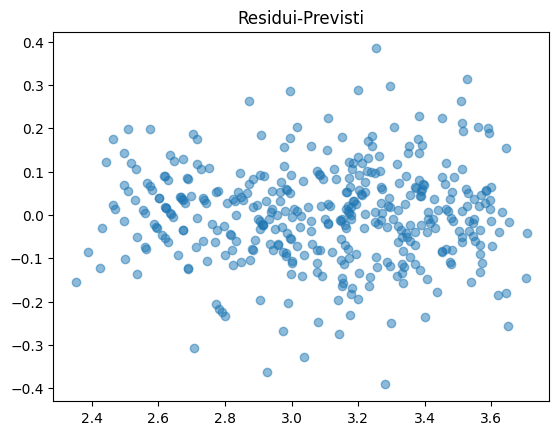

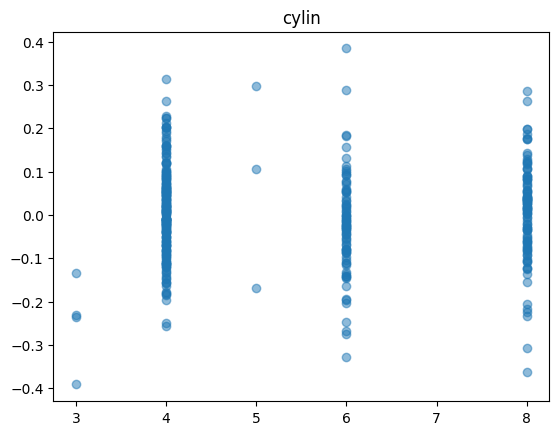

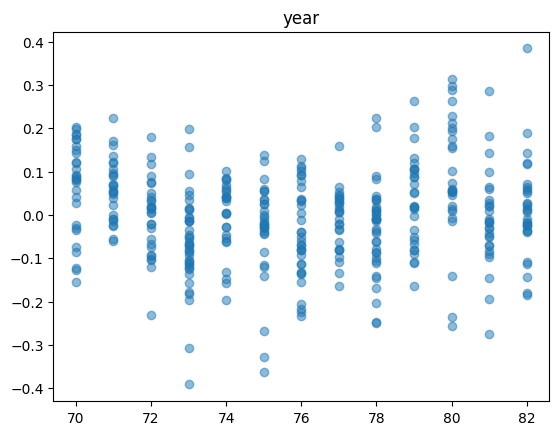

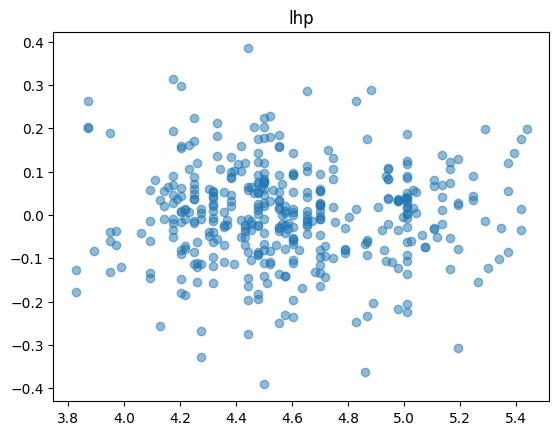

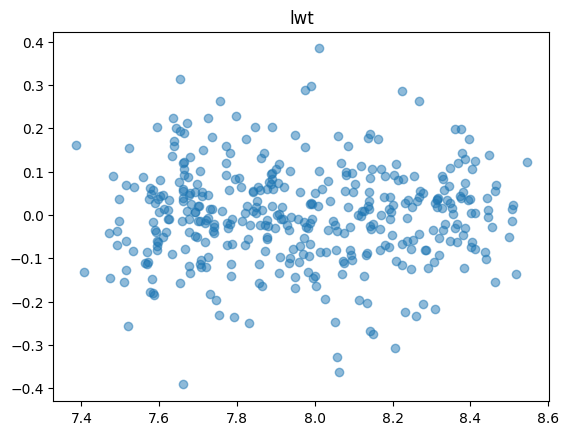

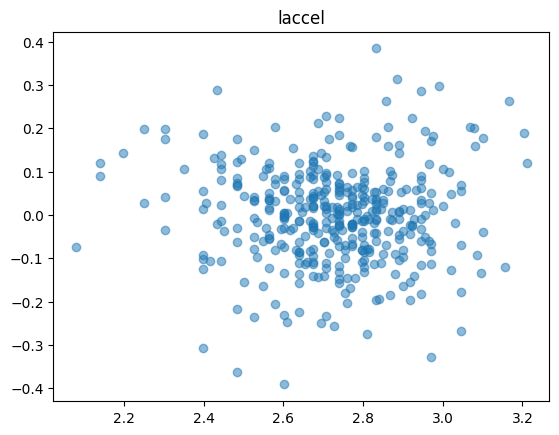

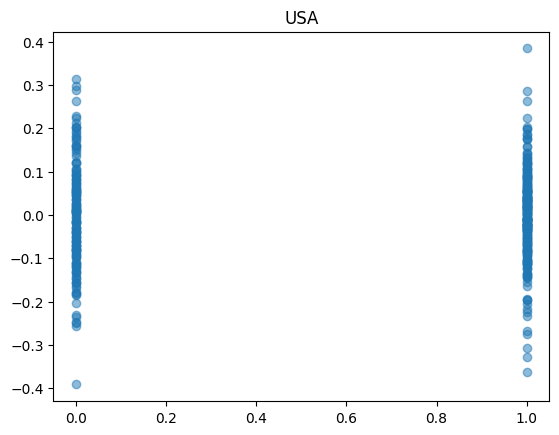

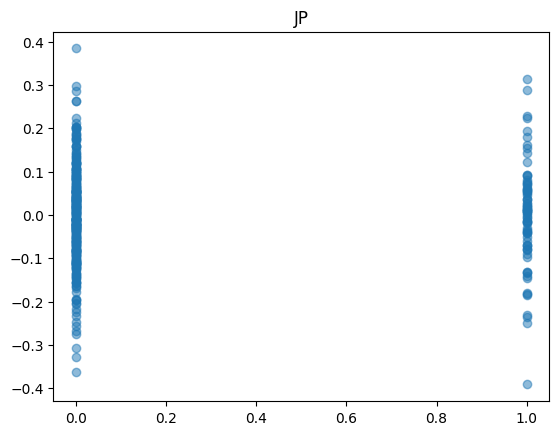

In [26]:
# Facciamo i grafici dei residui

def plot_resid(x, results, skip_first=True):
    plt.scatter(results.fittedvalues, results.resid, alpha=0.5)
    plt.title('Residui-Previsti')
    plt.show()
    first = 1 if skip_first else 0
    for var in x.columns[first:]:
        plt.scatter(x[var], results.resid, alpha=0.5)
        plt.title(var)
        plt.show()

plot_resid(x, result)

Inizia una procedura di selezione stepwise forward. Inizializza dizionari per modelli e risultati. Definisce l'elenco delle variabili predittrici candidate (`vars`). Itera su queste variabili, creando e adattando un modello di regressione semplice (solo costante e la variabile corrente) per ciascuna. Memorizza i modelli e i risultati.

In [27]:
# Proviamo a fare qualche step di selezione delle variabili stepwise forward.

models = {}
results = {}
vars = ['cylin', 'year', 'ldisp', 'lhp', 'lwt', 'laccel', 'USA', 'EU', 'JP']

for var in vars:
    x = sm.add_constant(dft_train5[var])

    models[var] = sm.OLS(y, x)
    results[var] = models[var].fit()

Itera sui risultati dei modelli semplici creati nella cella precedente. Stampa per ogni variabile il suo R-quadrato, il coefficiente ottenuto nel modello semplice e il coefficiente ottenuto nel modello completo (per confronto).

In [28]:
for var in vars:
    print(f'{var}: R²={results[var].rsquared:g}, coef={results[var].params[var]:g}, coef_full_model={("None" if var=="EU" else result.params[var])}')

cylin: R²=0.683293, coef=-0.164508, coef_full_model=-0.015285924977870903
year: R²=0.333886, coef=0.0532041, coef_full_model=0.030193886802283448
ldisp: R²=0.738496, coef=-0.548554, coef_full_model=0.017553936470084755
lhp: R²=0.721279, coef=-0.841372, coef_full_model=-0.2824293028334551
lwt: R²=0.763537, coef=-1.05737, coef_full_model=-0.5871080034386464
laccel: R²=0.214574, coef=0.869477, coef_full_model=-0.17491823407685544
USA: R²=0.319593, coef=-0.396377, coef_full_model=-0.050080925904340864
EU: R²=0.0646017, coef=0.22876, coef_full_model=None
JP: R²=0.195809, coef=0.373761, coef_full_model=-0.0022707659940077733


Identifica 'lwt' (logaritmo del peso) come la variabile più impattante basandosi sui risultati precedenti. Crea e adatta un modello OLS usando solo 'lwt' come predittore. Chiama `plot_resid` per visualizzare i grafici dei residui di questo modello semplice.

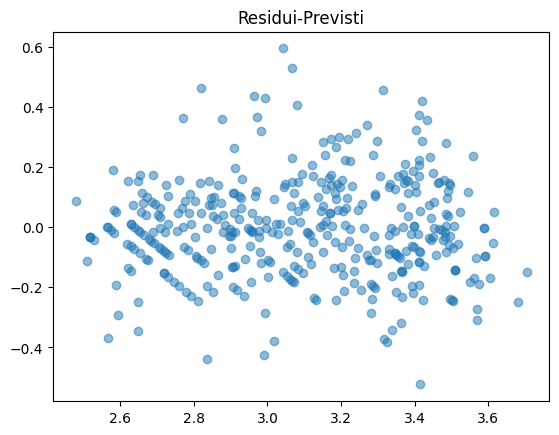

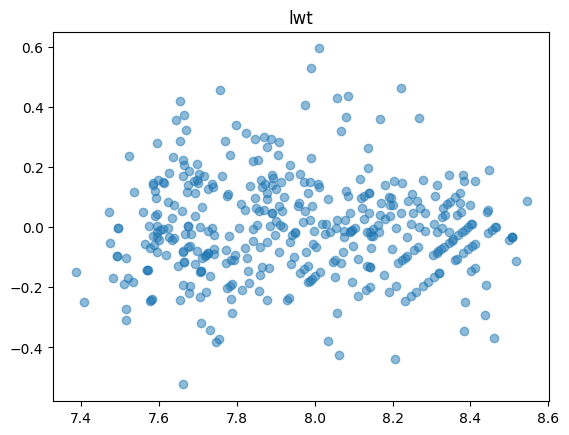

In [29]:
# Il peso è la variabile più impattante

# Magari controllo il grafico
x = sm.add_constant(dft_train5['lwt'])
res = sm.OLS(y, x).fit()
plot_resid(x, res)

Prepara il secondo passo della selezione stepwise forward. Definisce la variabile già selezionata (`taken = ['lwt']`). Itera sulle variabili rimanenti (`vars`), creando e adattando un modello OLS che include la costante, la variabile già selezionata ('lwt') e la variabile corrente. Memorizza i risultati.

In [30]:
# Vanno bene: prossimo step

taken = ['lwt']
results = {}

for var in vars:
    if var in taken:
        continue
    x = sm.add_constant(dft_train5[taken + [var]])
    results[var] = sm.OLS(y, x).fit()

Itera sui risultati dei modelli creati nel secondo passo stepwise. Stampa per ogni variabile candidata l'R-quadrato aggiustato e il coefficiente ottenuto nel modello a due predittori (lwt + variabile corrente).

In [31]:
for var in vars:
  if var in taken:
    continue
  print(f'{var}: R²={results[var].rsquared_adj:g}, coef={results[var].params[var]:g}')

cylin: R²=0.775648, coef=-0.0491256
year: R²=0.879521, coef=0.0328213
ldisp: R²=0.77383, coef=-0.204492
lhp: R²=0.793833, coef=-0.359883
laccel: R²=0.773131, coef=0.214799
USA: R²=0.763264, coef=-0.0273967
EU: R²=0.762321, coef=0.00163176
JP: R²=0.763296, coef=0.0299434


Seleziona 'year' come la prossima variabile da aggiungere basandosi sui risultati precedenti. Crea la matrice dei predittori con 'lwt' e 'year'. Chiama `plot_resid` per visualizzare i grafici dei residui del modello con queste due variabili.

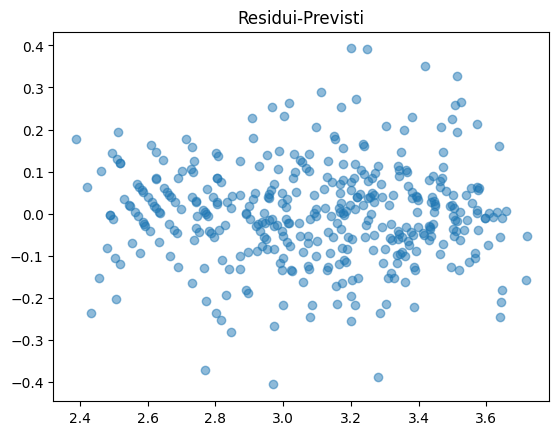

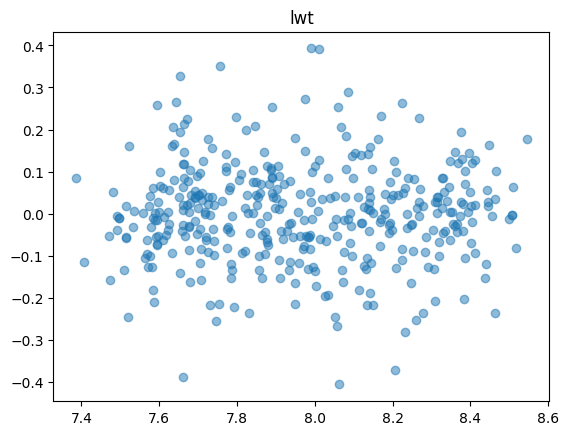

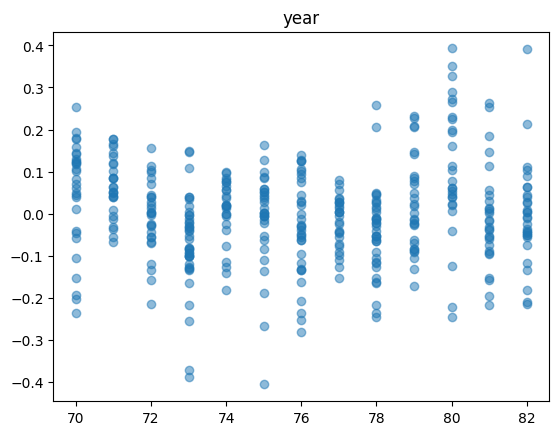

In [32]:
# Scelgo year e controllo il grafico

chosen = 'year'

x = sm.add_constant(dft_train5[taken + [chosen]])
plot_resid(x, results[chosen])

Definisce due funzioni di supporto per la selezione stepwise: `single_step` per eseguire un passo (testare l'aggiunta di ogni variabile rimanente a quelle già selezionate) e `print_step` per stampare i risultati di un passo (R-quadrato aggiustato e coefficiente per ogni variabile candidata).

In [33]:
def single_step(vars, taken, df):
    results = {}

    for var in vars:
        if var in taken:
            continue
        x = sm.add_constant(df[taken + [var]])
        results[var] = sm.OLS(y, x).fit()

    return results

def print_step(results):
    for var in results:
        print(f'{var}: R²={results[var].rsquared_adj:g}, coef={results[var].params[var]:g}')

Aggiunge la variabile selezionata ('year') alla lista delle variabili già incluse (`taken`).

In [34]:
taken += [chosen]

Esegue il terzo passo della selezione stepwise forward chiamando la funzione `single_step` con le variabili rimanenti e quelle già selezionate (`taken`). Stampa i risultati del passo chiamando `print_step`.

In [35]:
results = single_step(vars, taken, dft_train5)
print_step(results)

cylin: R²=0.881355, coef=-0.0201094
ldisp: R²=0.881215, coef=-0.0867221
lhp: R²=0.884656, coef=-0.157372
laccel: R²=0.880063, coef=0.0617692
USA: R²=0.881724, coef=-0.0446791
EU: R²=0.881509, coef=0.0453048
JP: R²=0.879238, coef=0.005091
